<a href="https://colab.research.google.com/github/Abdul3ati/PCVK_Genap_2021/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


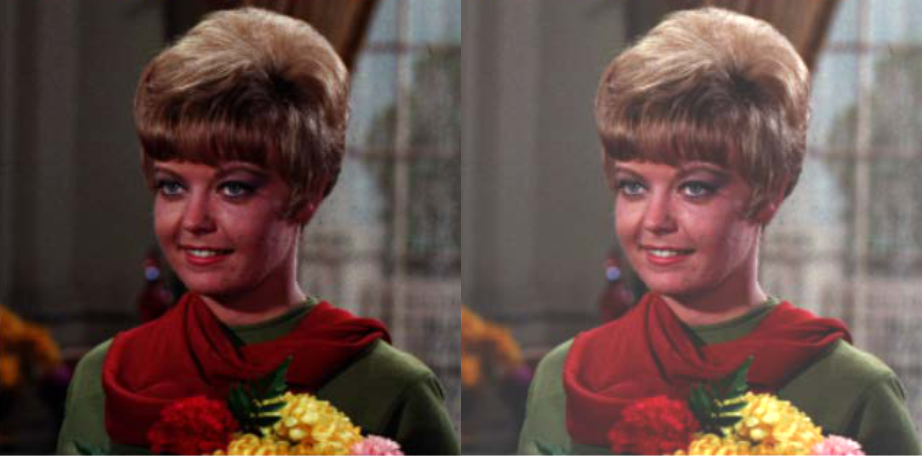

In [ ]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/week3.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Changing the contrast and brightness of the image
---------------------------------
Enter brightness level[-255 - 255]: 60
Enter contrast[1.0-3.0]: 1.5


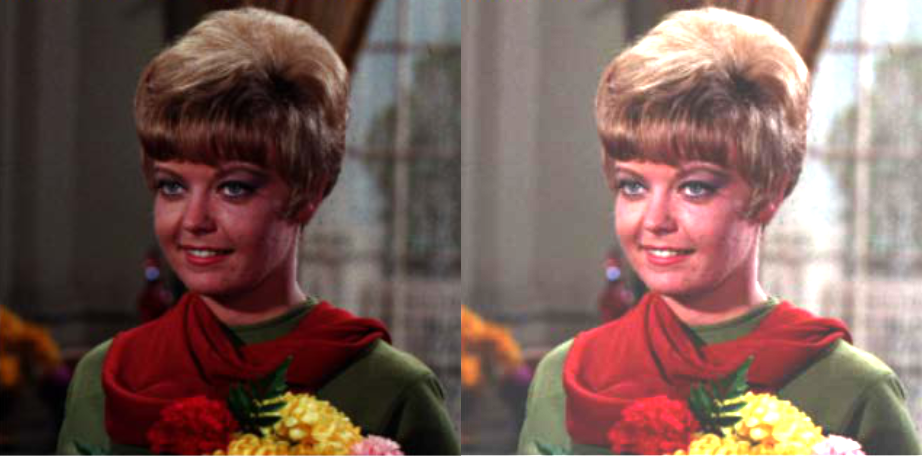

In [5]:
print(' Changing the contrast and brightness of the image')
print('---------------------------------')

try:
    brightness = int(input('Enter brightness level[-255 - 255]: '))
    contrast = float(input('Enter contrast[1.0-3.0]: '))
except ValueError:
  print('Error')
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/week3.png')
new_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      new_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness,0, 255)

final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

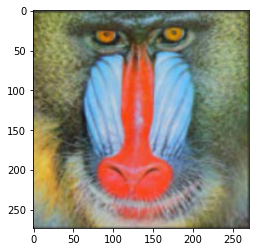

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/pic2.png')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

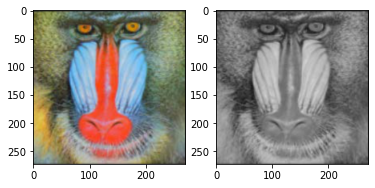

In [8]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/pic2.png')
img_gray[:] = img.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_gray)

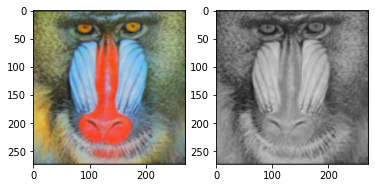

In [9]:
img_light = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/pic2.png')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

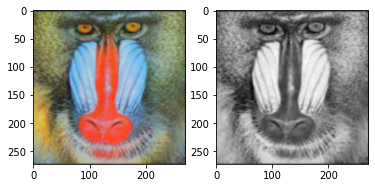

In [10]:
image_lum = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/pic2.png')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

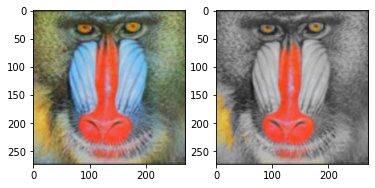

In [11]:
img_4 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/pic2.png')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')